<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_5_2_df_heatmaps_PM_MZM_analise_N_9_FIG_3_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 31249


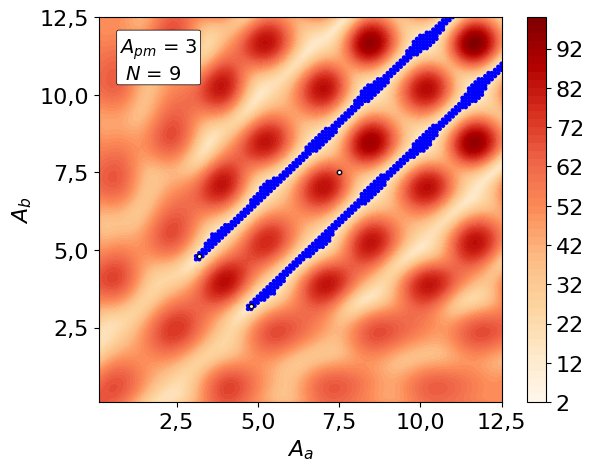

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter
from matplotlib.ticker import FuncFormatter
# Função para formatar os rótulos dos eixos com vírgula como separador decimal
def format_comma(x, pos):
    return f'{x:.1f}'.replace('.', ',')


# Valores específicos
Apm_value = 3
CV = 14.315  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm
color_cmap ='OrRd'

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9_Apm_3_Ax_0.1_a_12.5.csv'
#url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9.csv'

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(6.5, 5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap= color_cmap) # cmap='viridis')
plt.colorbar(contour)

# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color='blue', s=10, edgecolors='none', label=f'E <= {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = 9', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(5))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(5))  # Definir 6 ticks no eixo Y


Aa1 = 7.5; Ab1 = 7.5
Aa2 = 4.8; Ab2 = 3.2
Aa3 = 3.2; Ab3 = 4.8
#Aa4 = 9.07; Ab4 = 7.5
# Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Adicionando legenda
#plt.legend()

plt.show()



In [2]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8   # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))


CV fix: 10.49
AV fix: 1.22


Numero de dados low_e_points 620
AV max = 1.94
AV min = 0.41


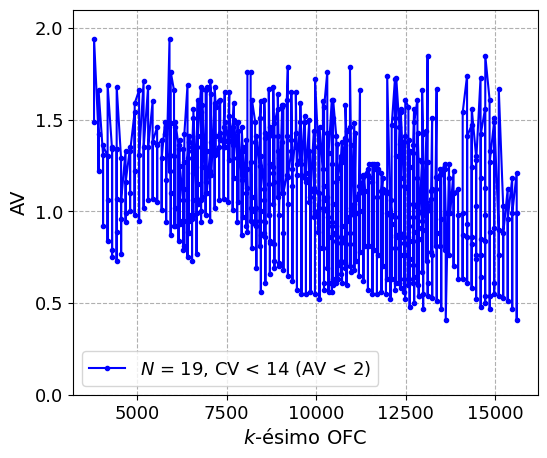

In [3]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'b.-', label='$N$ = 19, CV < 14 (AV < 2)')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

tamanho de amostras do df 15624


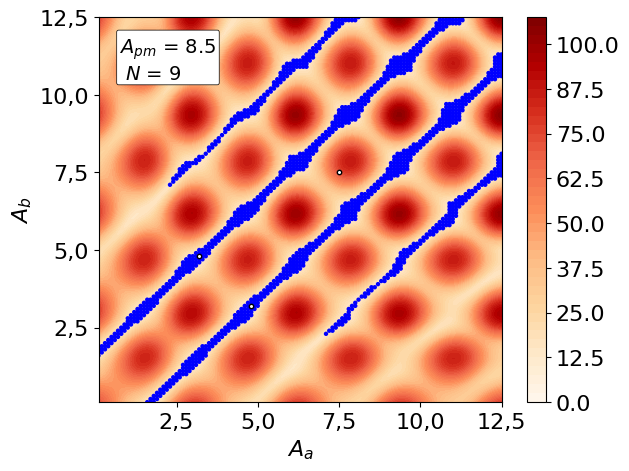

In [4]:
# Valores específicos
Apm_value = 8.5
CV1 = 10 #14.315
#CV1 = 11  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9_Apm_8.5_Ax_0.1_a_12.5.csv'
#url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9_Apm_8.5_Ax_2.1_a_12.5.csv'
# para Apm = 1.5 # https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9_Apm_1.5_Ax_2.1_a_12.5.csv

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(6.5, 5))
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap=color_cmap) # cmap='viridis')
plt.colorbar(contour)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color='blue', s=10 , edgecolors='none', label=f'E < {CV}')  # Sem bordas nos marcadores, color='r', marker='.')

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = 9', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))


Aa1 = 7.5; Ab1 = 7.5
Aa2 = 4.8; Ab2 = 3.2
Aa3 = 3.2; Ab3 = 4.8
#Aa4 = 9.07; Ab4 = 7.5
# Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(5))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(5))  # Definir 6 ticks no eixo Y


# Adicionando legenda
#plt.legend()

plt.show()


In [5]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8  # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))

CV fix: 5.93
AV fix: 0.6


Numero de dados low_e_points 674
AV max = 1.35
AV min = 0.24


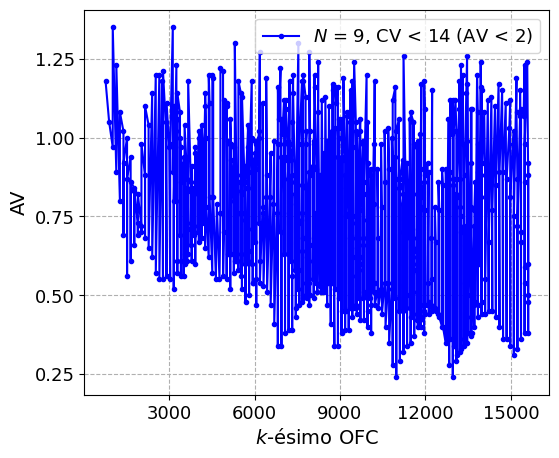

In [6]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV1]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(6,5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'b.-', label='$N$ = 9, CV < 14 (AV < 2)')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='upper right', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

In [7]:
# ENCONTRAR EQUIVALENCIA CV A AV
df = dfN15

# Variável M com valores de 1 a 20 em incrementos de 0.5
M = np.arange(3, 17, 0.1)

# Listas para armazenar os resultados
m_values = []
e_values = []
f_values = []

# Iterar sobre os valores de M
for m_value in M:
    # Filtrar o DataFrame para obter linhas onde E é menor que o valor atual de M
    filtered_df = df[df['E'] <= m_value]

    if not filtered_df.empty:
        # Encontrar o máximo valor de F no DataFrame filtrado
        max_f_value = filtered_df['F'].max()

        # Encontrar o valor correspondente de E para o máximo valor de F
        corresponding_e_value = filtered_df.loc[filtered_df['F'] == max_f_value, 'E'].values[0]

        # Adicionar os valores às listas
        m_values.append(m_value)
        e_values.append(round(corresponding_e_value,2))
        f_values.append(max_f_value)
    else:
        # Caso o DataFrame filtrado esteja vazio
        m_values.append(m_value)
        e_values.append(None)
        f_values.append(None)

# Criar um novo DataFrame com os resultados
results_df = pd.DataFrame({
    'M': m_values,
    'E': e_values,
    'F': f_values
})

# Exibir a tabela
#print(results_df)

# Remover as linhas repetidas, mantendo apenas a última ocorrência
df_unique = results_df.drop_duplicates(subset=['E', 'F'], keep='last')

print(df_unique)
# Salvar o DataFrame em um arquivo Excel
df_unique.to_excel('output_Apm_8_5_Aa_Ab.xlsx', index=False)

        M      E     F
1     3.1   2.86  0.36
2     3.2   3.17  0.40
4     3.4   3.20  0.40
5     3.5   3.49  0.43
7     3.7   3.55  0.47
8     3.8   3.77  0.49
10    4.0   3.89  0.52
12    4.2   4.07  0.54
15    4.5   4.26  0.54
16    4.6   4.55  0.58
18    4.8   4.69  0.58
21    5.1   4.87  0.62
23    5.3   5.17  0.68
24    5.4   5.30  0.70
26    5.6   5.43  0.70
27    5.7   5.68  0.70
28    5.8   5.80  0.76
30    6.0   5.82  0.76
31    6.1   6.00  0.79
32    6.2   6.15  0.81
33    6.3   6.25  0.81
37    6.7   6.39  0.86
38    6.8   6.78  0.87
40    7.0   6.84  0.88
41    7.1   7.09  0.90
45    7.5   7.12  0.93
48    7.8   7.50  0.98
49    7.9   7.80  1.00
51    8.1   7.95  1.02
55    8.5   8.18  1.08
58    8.8   8.54  1.11
60    9.0   8.85  1.14
67    9.7   9.02  1.23
69    9.9   9.73  1.27
75   10.5   9.94  1.35
78   10.8  10.59  1.37
82   11.2  10.82  1.44
85   11.5  11.23  1.46
86   11.6  11.55  1.50
89   11.9  11.66  1.53
92   12.2  11.91  1.61
97   12.7  12.30  1.62
98   12.8  